# Gaussian Mixture Model (GMM) Implementation

This notebook implements Gaussian Mixture Model clustering for 3D hand landmark data.

## Requirements Installation

```bash
pip install numpy pandas scikit-learn matplotlib
```


In [6]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd


## Step 1: Generate Synthetic Data (Demo)

For demonstration purposes, we'll first use synthetic data to show how GMM works. Then we'll apply it to the real hand landmark dataset.


In [7]:
# Create synthetic data for demo
# Creates 500 points in 2D grouped around 3 centers
# cluster_std controls how tight or spread each cluster is
# y is the true label (only for reference)
X, y = make_blobs(
    n_samples=500,
    centers=3,
    random_state=42,
    cluster_std=[1.0, 1.5, 0.8]   # spread for each cluster
)


## Step 2: Fit the Gaussian Mixture Model

`fit(X)` runs the EM algorithm to learn means, covariances and mixing weights.
`labels` gives the cluster index for each point (the component with highest posterior probability).


In [8]:
# Create and fit GMM model
gmm = GaussianMixture(
    n_components=3,        # number of Gaussian components
    covariance_type='full',
    random_state=42
)

gmm.fit(X)               
labels = gmm.predict(X)


## Step 3: Plot Clusters and Component Centers

Points colored by assigned cluster and red X marks showing the learned Gaussian centers.


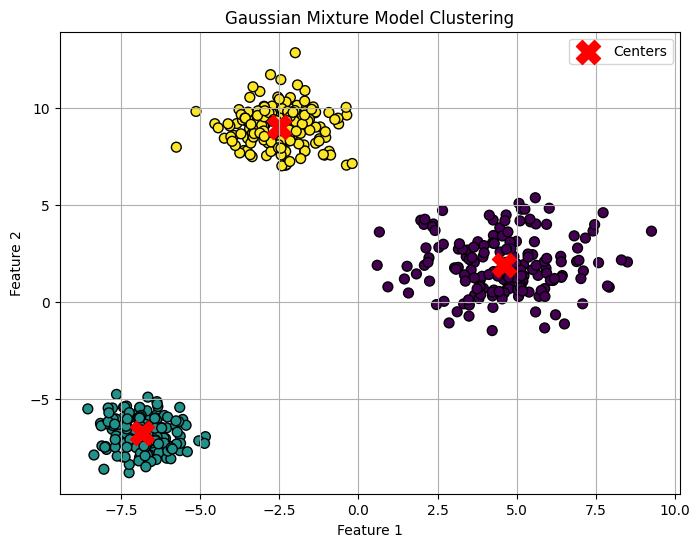

In [9]:
# Visualize the clustering results
plt.figure(figsize=(8, 6))

# scatter points colored by hard labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')

# plot Gaussian centers
plt.scatter(
    gmm.means_[:, 0],
    gmm.means_[:, 1],
    s=300,
    c='red',
    marker='X',
    label='Centers'
)

plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()
plt.show()


## Step 4: Apply GMM to Real Hand Landmark Data

Now let's apply GMM to the actual 3D hand landmark dataset.


In [18]:
# Load the real dataset
print("Loading hand landmark dataset...")
dataset = pd.read_csv('combined.csv')

# Extract X, Y, Z coordinates
coordinates = dataset[['X', 'Y', 'Z']].values

print(f"Dataset shape: {coordinates.shape}")
print(f"Total points: {len(coordinates):,}")


Loading hand landmark dataset...
Dataset shape: (2016000, 3)
Total points: 2,016,000


## Step 5: Fit GMM on Hand Landmark Data

We'll use 8 components (clusters) to match the K-Means implementation.


In [23]:
# Create GMM model with 8 components (matching K-Means)
gmm_real = GaussianMixture(
    n_components=8,        # number of Gaussian components
    covariance_type='full',  # full covariance matrix for each component
    random_state=42,
    max_iter=100,
    n_init=10
)

print("Fitting GMM model...")
print("This may take a few minutes for large datasets...")
gmm_real.fit(coordinates)

# Predict cluster labels
labels_real = gmm_real.predict(coordinates)

# Add cluster assignment to dataset
dataset['cluster'] = labels_real

print("GMM clustering completed!")


Fitting GMM model...
This may take a few minutes for large datasets...
GMM clustering completed!


In [24]:
gmm_real.predict_proba(coordinates)

array([[9.84977926e-068, 1.00000000e+000, 3.77442934e-042, ...,
        2.13413047e-047, 2.94481852e-038, 1.35748886e-297],
       [9.84977926e-068, 1.00000000e+000, 3.77442934e-042, ...,
        2.13413047e-047, 2.94481852e-038, 1.35748886e-297],
       [9.84977926e-068, 1.00000000e+000, 3.77442934e-042, ...,
        2.13413047e-047, 2.94481852e-038, 1.35748886e-297],
       ...,
       [4.86461942e-075, 0.00000000e+000, 1.34225713e-038, ...,
        1.42896483e-017, 7.34815124e-014, 0.00000000e+000],
       [6.58354647e-076, 0.00000000e+000, 8.14120100e-039, ...,
        5.25686784e-018, 1.63959416e-014, 0.00000000e+000],
       [1.46898778e-076, 0.00000000e+000, 4.93788801e-039, ...,
        3.18845152e-018, 3.65842908e-015, 0.00000000e+000]],
      shape=(2016000, 8))

## Step 6: Evaluate Clustering Performance

Calculate evaluation metrics: Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index.
(Skipped due to high computational time requirement)

## Step 7: Visualize 3D Clustering Results

Create 3D scatter plots showing the clusters and Gaussian component centers.


Visualization saved as: GMM_clustering_visualization.png


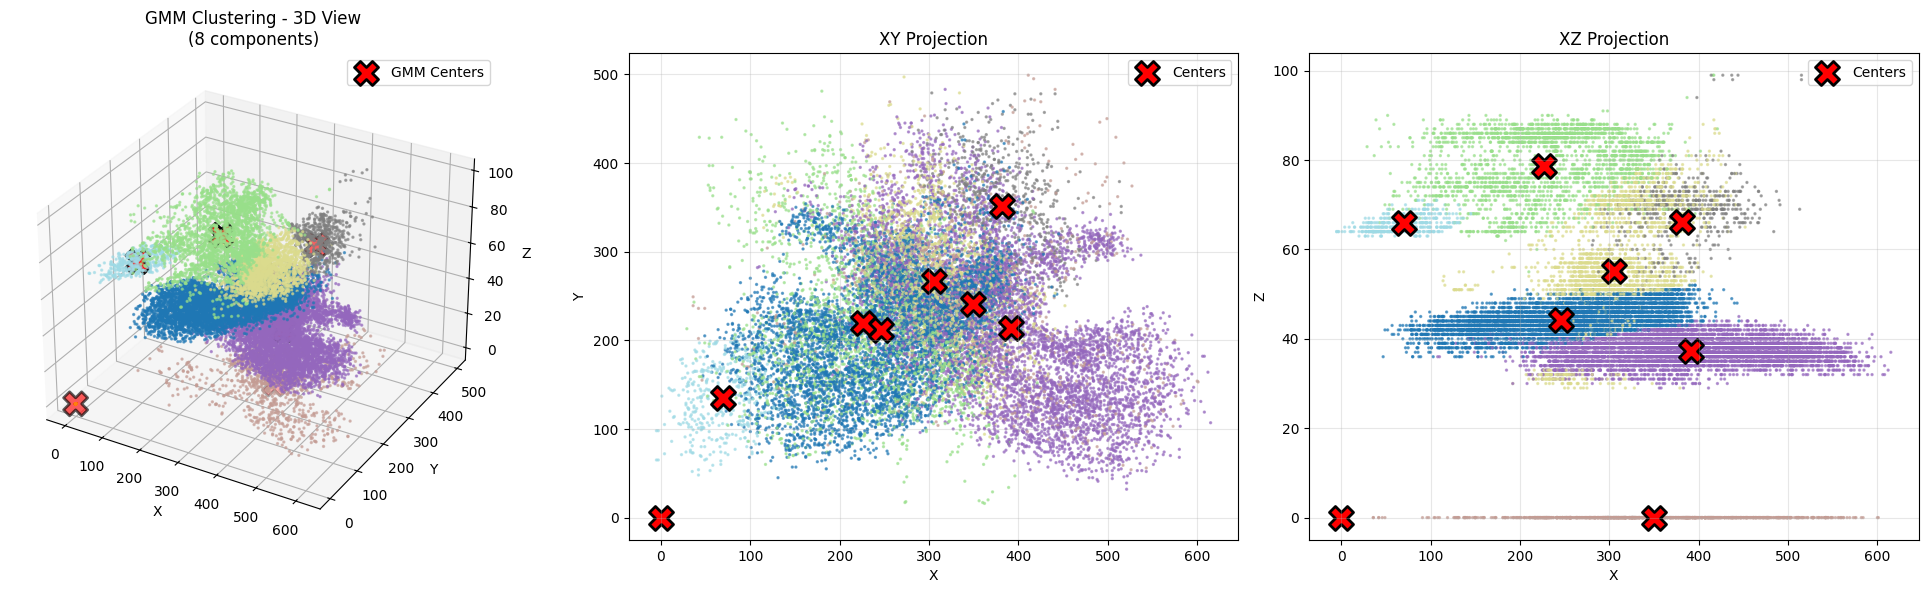

In [25]:
# Sample data for visualization (too many points slow down plotting)
sample_size = min(30000, len(coordinates))
sample_indices = np.random.choice(len(coordinates), sample_size, replace=False)
coords_sample = coordinates[sample_indices]
labels_sample = labels_real[sample_indices]

# Create 3D visualization
fig = plt.figure(figsize=(20, 6))

# 1. 3D Scatter Plot
ax1 = fig.add_subplot(131, projection='3d')
scatter = ax1.scatter(coords_sample[:, 0], coords_sample[:, 1], coords_sample[:, 2], 
                     c=labels_sample, cmap='tab20', s=2, alpha=0.6)

# Plot Gaussian centers
ax1.scatter(gmm_real.means_[:, 0], gmm_real.means_[:, 1], gmm_real.means_[:, 2],
           s=300, c='red', marker='X', label='GMM Centers', edgecolors='black', linewidths=2)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title(f'GMM Clustering - 3D View\n(8 components)')
ax1.legend()

# 2. XY Projection
ax2 = fig.add_subplot(132)
ax2.scatter(coords_sample[:, 0], coords_sample[:, 1], c=labels_sample, cmap='tab20', s=2, alpha=0.6)
ax2.scatter(gmm_real.means_[:, 0], gmm_real.means_[:, 1], s=300, c='red', marker='X', 
           label='Centers', edgecolors='black', linewidths=2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('XY Projection')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. XZ Projection
ax3 = fig.add_subplot(133)
ax3.scatter(coords_sample[:, 0], coords_sample[:, 2], c=labels_sample, cmap='tab20', s=2, alpha=0.6)
ax3.scatter(gmm_real.means_[:, 0], gmm_real.means_[:, 2], s=300, c='red', marker='X', 
           label='Centers', edgecolors='black', linewidths=2)
ax3.set_xlabel('X')
ax3.set_ylabel('Z')
ax3.set_title('XZ Projection')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('GMM_clustering_visualization.png', dpi=300, bbox_inches='tight')
print("Visualization saved as: GMM_clustering_visualization.png")
plt.show()


## Step 8: Save Results

Save the clustered dataset for further analysis.


In [27]:
# Save clustered dataset
output_file = 'combined_gmm_clustered.csv'
dataset.to_csv(output_file, index=False)
print(f"Clustered dataset saved as: {output_file}")

# Print summary statistics
print("\nCluster Summary:")
for i in range(8):
    count = (labels_real == i).sum()
    percentage = 100 * count / len(labels_real)
    print(f"Cluster {i}: {count:,} points ({percentage:.2f}%)")


Clustered dataset saved as: combined_gmm_clustered.csv

Cluster Summary:
Cluster 0: 404,252 points (20.05%)
Cluster 1: 755,496 points (37.48%)
Cluster 2: 155,668 points (7.72%)
Cluster 3: 414,816 points (20.58%)
Cluster 4: 68,418 points (3.39%)
Cluster 5: 36,120 points (1.79%)
Cluster 6: 150,558 points (7.47%)
Cluster 7: 30,672 points (1.52%)
